<a href="https://colab.research.google.com/github/shua1zhang/pytorch-playground/blob/master/PyTorch_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch Test Playground


### Import basic libs 

In [1]:
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
%matplotlib inline

if(torch.cuda.is_available()):
  print("GPU is avaliable")

GPU is avaliable


In [36]:
data_trans = transforms.ToTensor()

train_data = torchvision.datasets.CIFAR10("./cifar", train=True, download=True,
                                          transform=data_trans)
test_data  = torchvision.datasets.CIFAR10("./cifar", train=False, download=True,
                                          transform=data_trans)

data_class = train_data.classes
train_batch = 16
test_batach = 16

train_data_loader = torch.utils.data.DataLoader(train_data, batch_size=train_batch, 
                                                shuffle=True)
test_data_loader = torch.utils.data.DataLoader(test_data, batch_size=test_batach, 
                                               shuffle=True)



Files already downloaded and verified
Files already downloaded and verified


torch.Size([3, 32, 32])

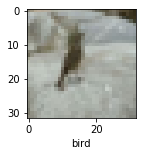

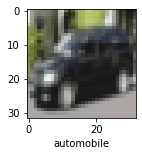

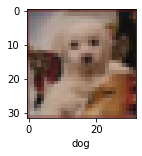

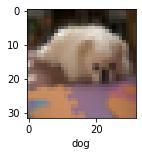

In [37]:
data_iter = iter(train_data_loader)
images, labels = data_iter.next()

for i in range(4):
  image = images[i]
  label = labels[i]
  image_show = np.transpose(image.numpy(),[1,2,0]) 
  plt.figure(figsize=(2,2))
  plt.imshow(image_show)
  plt.xlabel(data_class[label])

image.size()

### Build and train network

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [0]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()    
    self.conv1 = nn.Conv2d(3, 32, 5)  #28x28 ->24x24
    self.bn = nn.BatchNorm2d()
    self.pool1 = nn.MaxPool2d(2, 2)  #24x24 -> 12*12
    self.conv2 = nn.Conv2d(32, 64, 5) #12x12 -> 8x8
    self.pool2 = nn.MaxPool2d(2, 2)  #8x8 -> 4x4
    self.fc1 = nn.Linear(64*5*5, 100)
    self.fc2 = nn.Linear(100, 10)

  def forward(self, x):
    x = self.pool1(F.relu(self.conv1(x)))
    x = self.pool2(F.relu(self.conv2(x)))
    x = x.view(-1, 5*5*64)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x 

net = Net()

### Loss function 

In [0]:
import torch.optim as optim

loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

## Train

In [88]:
for epoch in range(5):

  running_loss = 0.0
  for i, data in enumerate(train_data_loader, 0):
    #load image and label 
    train_imgs, labels = data

    train_imgs.size(), labels.size()
    #zero gradient 
    optimizer.zero_grad()

    #forwad, BP
    net_out = net(train_imgs)
    loss = loss_func(net_out, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    samples = 1000

    if i % samples == (samples - 1):
      print('[%d, %5d] loss: %.3f' % 
            (epoch+1, i+1, running_loss/samples))
      running_loss = 0.0

print('Training Finished')





[1,  1000] loss: 1.915
[1,  2000] loss: 1.565
[1,  3000] loss: 1.447
[2,  1000] loss: 1.358
[2,  2000] loss: 1.307
[2,  3000] loss: 1.273
[3,  1000] loss: 1.171
[3,  2000] loss: 1.159
[3,  3000] loss: 1.166
[4,  1000] loss: 1.051
[4,  2000] loss: 1.085
[4,  3000] loss: 1.082
[5,  1000] loss: 0.961
[5,  2000] loss: 1.004
[5,  3000] loss: 1.014
Training Finished


### Test

Accuracy of the network with 10000 images: 60 %


Text(0.5, 0, 'automobile')

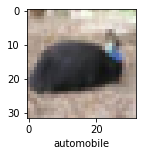

In [92]:
total = 0
correct = 0  

with torch.no_grad():
  for data in test_data_loader:
    test_imgs, labels = data
    results = net(test_imgs)
    value, predicts = torch.max(results.data, 1)
    total += labels.size(0)
    correct += (predicts == labels).sum().item()

print('Accuracy of the network with %d images: %d %%' % (total, (100*correct/total)))

plt.figure(figsize=(2,2))
plt.imshow(np.transpose(test_imgs[0].numpy(),[1,2,0]))
plt.xlabel(data_class[predicts[0]])